In [1]:
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
#from ztrans import *
%matplotlib inline

def choose_windows(name='Hamming', N=20):
    # Rect/Hanning/Hamming
    if name == 'Hamming':
        window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Hanning':
        window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Rect':
        window = np.ones(N)
    elif name == 'black':
        window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return window

# Ejemplo filtro pasabajas a 1000 Hz

## Consideraciones iniciales

In [2]:
fc=1000.0
fs=8000.0 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles
N = 512 # Numero de puntos de la FFT
BW=1000 # Ancho de banda en la banda de transicion

wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes

bwn=BW/fs # ancho de banda  normalizado en radianes

M=int(4/bwn) # orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M,M)


Orden del filtro:  32


## Diseño del filtro

In [3]:
h1 = (wc)/np.pi * np.sinc(wc*(n)/np.pi) # Respuesta del filtro ideal 

w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

win2 = choose_windows(name='black', N=len(n))

h2=h1*win2 # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2=h2*A # Ganancia del filtro
w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado


## Graficas

Text(0, 0.5, '$|H2(\\omega)| $')

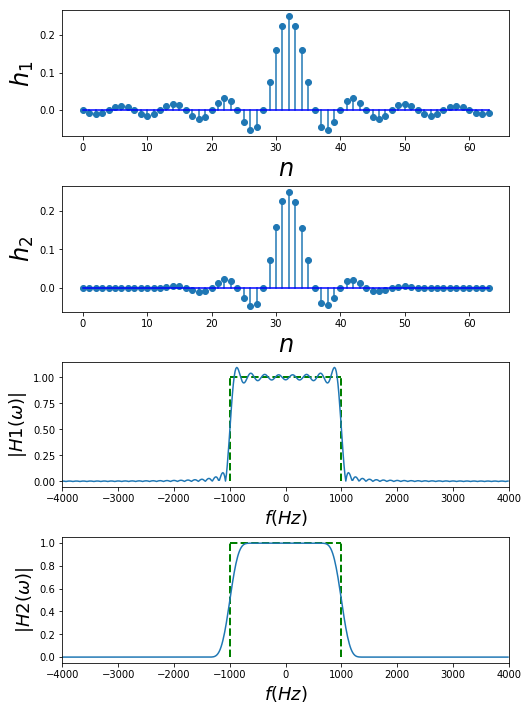

In [4]:
fig1,axs1 = subplots(4,1)
fig1.set_size_inches((8,12))
subplots_adjust(hspace=0.4)

ax=axs1[0]
ax.stem(n+M,h1,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_1$",fontsize=24)


ax=axs1[1]
ax.stem(n+M,h2,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_2$",fontsize=24)

ax=axs1[2]
ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

ax=axs1[3]
ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)



